<a href="https://colab.research.google.com/github/KMate-ISD/Machine_learning/blob/main/ML_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Basics

### Iris classification problem

[scikit-learn: Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [27]:
# import the data (50 data points of each class of irises)
from sklearn import datasets

import matplotlib.pyplot as plt
import math
import random

data_iris=datasets.load_iris()

# print(data_iris.DESCR)
print(dir(data_iris))
print(data_iris.target_names)
print(data_iris.feature_names)

for i in range(1):
  print(data_iris.data[random.randrange(0,150)])

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[7.7 3.  6.1 2.3]


### Plot data

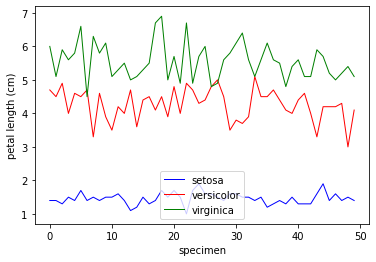

In [31]:
x=[i for i in range(50)]

petal_length_setosa=[]
petal_length_versicolor=[]
petal_length_virginica=[]

# plot random feature
k=random.randrange(len(data_iris.feature_names))

for i in range(0,50):
  petal_length_setosa.append(data_iris.data[i][k])
  petal_length_versicolor.append(data_iris.data[i+50][k])
  petal_length_virginica.append(data_iris.data[i+100][k])

plt.plot(x, petal_length_setosa, label=data_iris.target_names[0], color='blue', linewidth=1)
plt.plot(x, petal_length_versicolor, label=data_iris.target_names[1], color='red', linewidth=1)
plt.plot(x, petal_length_virginica, label=data_iris.target_names[2], color='green', linewidth=1)

plt.legend(loc='lower center')
plt.ylabel(data_iris.feature_names[k])
plt.xlabel('specimen')

plt.show()